<a href="https://colab.research.google.com/github/lima-breno/natural_language_processing/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto
-------------------------------------------------------------------------

# **Acidente da Air India em Ahmedabad: Análise de um Conjunto de Dados de Vídeos do YouTube**

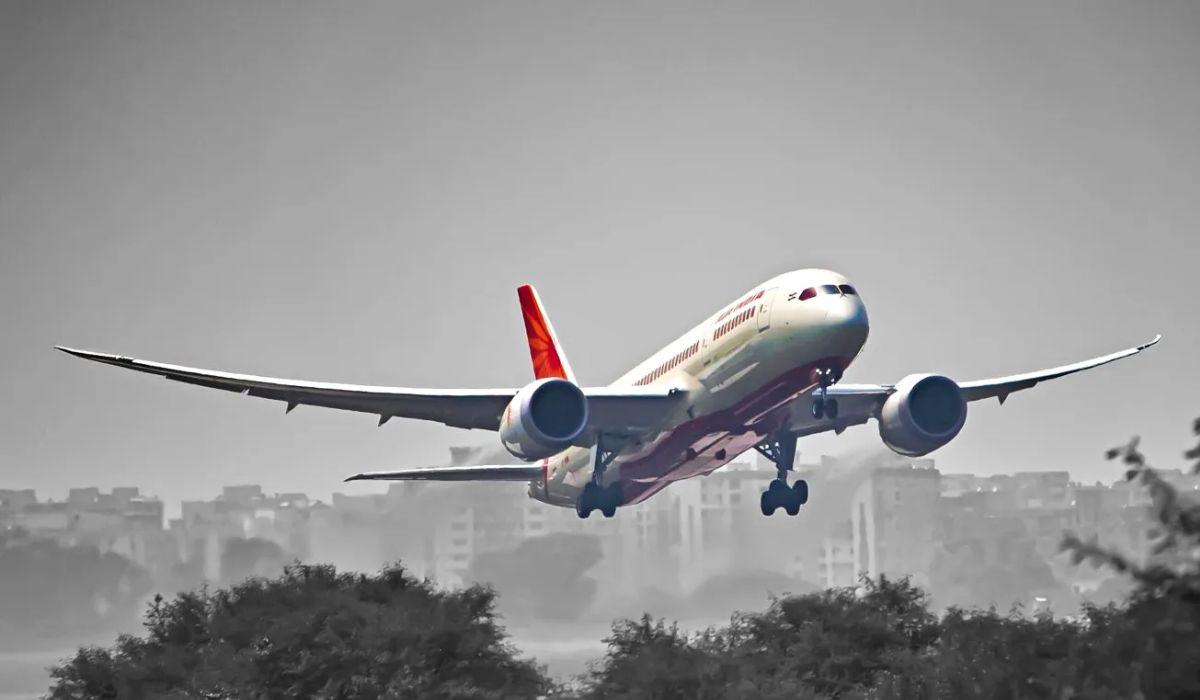

## **Visão geral do conjunto de dados**

Este conjunto de dados contém informações abrangentes do YouTube coletadas durante a cobertura do acidente de voo da Air India em Ahmedabad, na Índia. Ele captura o sentimento público, os padrões de engajamento e as análises de conteúdo geradas a partir da resposta do YouTube a esse grande incidente de aviação. Este conteúdo será utilizado para o desenvolvimento do *Trabalho Prático - Relatório Final*  da disciplina de Processamento de Linguagem Natural.



## Coleta de Dados
* Período de Coleta: 16/06/2025
* Fonte: Vídeos e comentários do YouTube relacionados a "Air India flight crashes in Ahmedabad, India"
* Método de Coleta: Coleta automatizada (scraping)
* Total de Vídeos Analisados: 94 vídeos
* Total de Comentários: 17.964 comentários


## Conteúdo do conjunto de dados
* Comentários dos usuários com registros de data e hora
* Contagem de curtidas, não curtidas e métricas de respostas
* Informações dos autores e hierarquia dos comentários (respostas)
* Indicadores de sentimento e dados de engajamento

## Aplicação proposta para o Trabalho Prático
* Análise de Sentimento: Analisar a opinião pública durante eventos de crise
* Análise de Mídias Sociais: Examinar o engajamento durante notícias de última hora
* Processamento de Linguagem Natural (NLP): Análise textual de conteúdos relacionados a desastres


# Importando bibliotecas

In [ ]:
!pip install nltk
!pip install twython
!pip install textblob
!pip install wordcloud
!pip install langdetect

In [ ]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import re
import ast

from nltk.probability import FreqDist
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('rslp')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

from nltk.stem import WordNetLemmatizer
from langdetect import detect, DetectorFactory
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#Importando o Conjunto de Dados


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/11PSJWdwqMQMSluajzlO_ZOGNbEspx192/export?format=xlsx'

df = pd.read_excel(url)

df

,commentId,content,publishedTime,replyLevel,authorButtonA11y,video_id,likeCountLiked,likeCountDisliked,replyCount,imageAttachmentMaxHeight
0,UgxQ92754WCORvWYViB4AaABAg,From india,1 day ago,0,@AxomBikrom,bWO_1UwLh1I,1,NaN,NaN,NaN
1,Ugw5IY1FioVXvF0vdOd4AaABAg,Captain Sumit sabharwal sir respect button ✅ O...,1 day ago,0,@manjhisachin,bWO_1UwLh1I,1,NaN,NaN,NaN
2,UgzkZc_HmvQPYyWNfxN4AaABAg,From india,1 day ago,0,@priytamkumar6749,bWO_1UwLh1I,1,NaN,NaN,NaN
3,Ugw0QFXQkJ68nKlcczh4AaABAg,Condolences from Nigeria 😢😢😢😢 May Allah forgiv...,1 day ago,0,@OluwaseunAbike-c9l,bWO_1UwLh1I,1,NaN,NaN,NaN
4,UgzXiiZwo-1rOYr1aNp4AaABAg,its all happened due to boeing poor manufactur...,2 days ago,0,@Sillyworld376,bWO_1UwLh1I,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
17959,UgyP1Dx8D-gEG2TGZ6V4AaABAg,Turkish Technics look after Air India maintena...,2 days ago,0,@manishsharma-hv6vk,bWO_1UwLh1I,1,NaN,NaN,NaN
17960,Ugy0OS2T3yOtiShqAkh4AaABAg,"ငါတို့ PDF လေးတွေ ၁၀ ယောက် , အခုတော့ ဝဋ်လည်မြန...",3 days ago,0,@myint2356,bWO_1UwLh1I,2,NaN,NaN,NaN
17961,Ugywg4iSBZCCjQol3dB4AaABAg,Tell me that this poor guy won't be suffering ...,3 days ago,0,@MyBigoo,bWO_1UwLh1I,12,NaN,NaN,NaN
17962,Ugydb7xEPKAffnkrHaV4AaABAg,why it has to be india all the time ???!,3 days ago,0,@goodfredlarson,bWO_1UwLh1I,3,NaN,NaN,NaN


In [ ]:
data= df[['content', 'likeCountLiked', 'likeCountDisliked']]
data.head(20)

,content,likeCountLiked,likeCountDisliked
0,From india,1,NaN
1,Captain Sumit sabharwal sir respect button ✅ O...,1,NaN
2,From india,1,NaN
3,Condolences from Nigeria 😢😢😢😢 May Allah forgiv...,1,NaN
4,its all happened due to boeing poor manufactur...,1,NaN
5,Condolences from Slovakia!,1,NaN
6,Wifi High resolution Cameras are so cheap thes...,1,NaN
7,😭😭😭,1,NaN
8,Whistleblowers had said….now BOEING is FINISHE...,2,NaN
9,😢😢 may thier soul rest in peace,1,NaN


Os dados a serem utilizados no Relatório se referem a:

* **Conteúdo**: Comentários dos usuários do Youtube
* **likeCountLiked**: Contagem da quantidade de Curtidas "*Likes*" realizadas para cada comentário individual
* **likeCountDisliked**: Contagem da quantidade de Não Curtidas "*Dislikes*" realziadas para cada comentário individual

#📜 Workflow do Projeto

### 1.Etapa de pré-processamento do texto
  * 1.1 Remoção de línguas distintas ao inglês
  * 1.2 Remoção de pontuação
  * 1.3 Reemoção de números
  * 1.4 Tokenização
  * 1.5 Remoção de Stopwords
  * 1.6 Lematização

### 2.Visualização do texto processado
  * 2.1 Cálculo das frequências dos termos
  * 2.2 Gráfico Barplot
  * 2.3 Nuvem de palavras

### 3. Análise de sentimento
  * 3.1 Definição do Rótulo de Sentimento (Variável Alvo)
  * 3.2 Divisão dos dados em treino e teste
  * 3.3 Vetorização de Texto (Transformando Texto em Números)
  * 3.4 Treinando o modelo com regressão logística
  * 3.5 Avaliação do Modelo

### 4. Modelagem
  * 4.1 Regressão Logistica
  * 4.2 Random Forest

## 1. Pré-processamento do texto

### 1.0 Remoção de línguas distintas ao inglês
Os vídeos publicados foram acessados por pessoas de diversos países. Assim, para facilitar o tratamento incial, optou-se por remover os comentários que não foram escritos em inglês.

In [ ]:
DetectorFactory.seed = 0  # Garante resultados consistentes

# Função para detectar o idioma do texto apresentado na coluna content
def detectar_idioma(texto):
    try:
        return detect(texto)
    except:
        return 'erro'

# Função para criar uma nova coluna 'idioma' com o idioma detectado
data.loc[:, 'idioma'] = data['content'].apply(detectar_idioma)

# Remove linhas onde o idioma não é inglês ou houve erro conforme função inicial
data = data[data['idioma'] == 'en'].reset_index(drop=True)

/tmp/ipython-input-5-2932515609.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'idioma'] = data['content'].apply(detectar_idioma)


In [ ]:
data

,content,likeCountLiked,likeCountDisliked,idioma
0,From india,1,NaN,en
1,Captain Sumit sabharwal sir respect button ✅ O...,1,NaN,en
2,From india,1,NaN,en
3,Condolences from Nigeria 😢😢😢😢 May Allah forgiv...,1,NaN,en
4,its all happened due to boeing poor manufactur...,1,NaN,en
...,...,...,...,...
14368,"IAS officer Faiz Ahmed Kidwai, a 1996-batch of...",1,NaN,en
14369,Turkish Technics look after Air India maintena...,1,NaN,en
14370,Tell me that this poor guy won't be suffering ...,12,NaN,en
14371,why it has to be india all the time ???!,3,NaN,en


### 1.1 Lowercase
Na primeira etapa do nosso projeto, optou-se por converter os comentários da coluna 'Content' para letras minúsculas. Isso padroniza os dados em um formato uniforme, eliminando inconsistências que podem surgir devido à diferenciação entre maiúsculas e minúsculas durante a fase de processamento de texto.

In [ ]:
data['content'] = data['content'].str.lower()
data['content']

,content
0,from india
1,captain sumit sabharwal sir respect button ✅ o...
2,from india
3,condolences from nigeria 😢😢😢😢 may allah forgiv...
4,its all happened due to boeing poor manufactur...
...,...
14368,"ias officer faiz ahmed kidwai, a 1996-batch of..."
14369,turkish technics look after air india maintena...
14370,tell me that this poor guy won't be suffering ...
14371,why it has to be india all the time ???!


###1.2 Remoção de pontuação
Nesta etapa, foi removido as marcas de pontuação dos comentários na coluna 'content'. Esse processo tem como objetivo aumentar a eficiência das nossas tarefas de processamento de linguagem, tornando os dados textuais mais limpos e adequados para análise.

In [ ]:
data['content'] = data['content'].str.replace(r'[^\w\s]', '', regex=True)
data['content']

,content
0,from india
1,captain sumit sabharwal sir respect button om...
2,from india
3,condolences from nigeria may allah forgive th...
4,its all happened due to boeing poor manufacturing
...,...
14368,ias officer faiz ahmed kidwai a 1996batch offi...
14369,turkish technics look after air india maintena...
14370,tell me that this poor guy wont be suffering f...
14371,why it has to be india all the time


### 1.3 Remoção de números

Nesta etapa foi removido os caracteres numéricos dos comentários na coluna 'content'. Ao eliminar os números do texto, esse processo nos permite focar mais nas tarefas de processamento de linguagem e análise textual. Consequentemente, conseguimos concentrar a análise apenas no conteúdo textual, o que possibilita uma interpretação dos dados mais limpa e significativa.



In [ ]:
data['content'] = data['content'].str.replace('\d', '')
data

,content,likeCountLiked,likeCountDisliked,idioma
0,from india,1,NaN,en
1,captain sumit sabharwal sir respect button om...,1,NaN,en
2,from india,1,NaN,en
3,condolences from nigeria may allah forgive th...,1,NaN,en
4,its all happened due to boeing poor manufacturing,1,NaN,en
...,...,...,...,...
14368,ias officer faiz ahmed kidwai a 1996batch offi...,1,NaN,en
14369,turkish technics look after air india maintena...,1,NaN,en
14370,tell me that this poor guy wont be suffering f...,12,NaN,en
14371,why it has to be india all the time,3,NaN,en


###1.4 Tokenização
Nesta etapa, estamos transformando o texto em uma lista de palavras (ou "tokens"). Isso é importante para as próximas etapas do pré-processamento, como remoção de stopwords e lematização, já que permite o trabalho com palavras individuais. A tokenização separa frases em partes analisáveis, permitindo uma análise mais precisa de cada termo.

In [ ]:
data['content'] = data['content'].apply(lambda x: TextBlob(x).tokens)
data.head(20)

,content,likeCountLiked,likeCountDisliked,idioma
0,"[from, india]",1,NaN,en
1,"[captain, sumit, sabharwal, sir, respect, butt...",1,NaN,en
2,"[from, india]",1,NaN,en
3,"[condolences, from, nigeria, may, allah, forgi...",1,NaN,en
4,"[its, all, happened, due, to, boeing, poor, ma...",1,NaN,en
5,"[wifi, high, resolution, cameras, are, so, che...",1,NaN,en
6,"[whistleblowers, had, saidnow, boeing, is, fin...",2,NaN,en
7,"[may, thier, soul, rest, in, peace]",1,NaN,en
8,"[may, the, souls, of, all, the, faithfully, de...",1,NaN,en
9,"[condolences, from, south, sudan]",1,NaN,en


###1.5 Remoção de StopWord

Nesta etapa estamos removendo as palavras que são muito comuns, que não carregam muito significado por sim só, como "e", "de", "a", dentre outras.Elas ocupam espaço e podem "poluir" a análise do modelo, fazendo com que ele dê importância a coisas que não importam.

In [ ]:
stop_words = set(stopwords.words('english'))

def remover_stopwords(texto):
    return [palavra for palavra in texto if palavra not in stop_words]

data.loc[:, 'content'] = data['content'].apply(remover_stopwords)
print("Após remover stopwords:")
print(data['content'].head(20))

Após remover stopwords:
0                                               [india]
1     [captain, sumit, sabharwal, sir, respect, butt...
2                                               [india]
3     [condolences, nigeria, may, allah, forgive, sh...
4          [happened, due, boeing, poor, manufacturing]
5     [wifi, high, resolution, cameras, cheap, days,...
6           [whistleblowers, saidnow, boeing, finished]
7                       [may, thier, soul, rest, peace]
8     [may, souls, faithfully, departed, mercies, go...
9                           [condolences, south, sudan]
10                                     [condoms, india]
11                                [condolences, turkey]
12                                    [pilot, bradford]
13    [expressing, condolences, bangladesh, banglade...
14    [say, court, case, boeing, boss, loss, couldnt...
15    [india, one, terrorist, country, world, india,...
16    [minister, civil, aviation, must, resign, offi...
17    [airline, official

###1.7 Lematização

Nesta etapa iremos reduzir as palavras à sua forma base, o que ajudará o modelo a reconhecer que palavras diferentes (mas com o mesmo significado base) são a mesma coisa, reduzindo a complexidade.

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

def lematizar_texto(texto):
    return [wordnet_lemmatizer.lemmatize(word) for word in texto]

data.loc[:, 'content'] = data['content'].apply(lematizar_texto)
data['content'].head()

,content
0,[india]
1,"[captain, sumit, sabharwal, sir, respect, butt..."
2,[india]
3,"[condolence, nigeria, may, allah, forgive, sho..."
4,"[happened, due, boeing, poor, manufacturing]"


## 2. Visualização do texto

### 2.1 Cálculo das frequências dos termos
Nesta etapa, foi calculada as frequências (tf, ou *term frequency*) de todas as palavras nos comentários da coluna 'content'. Foram separadas as palavras de cada comentário, contado quantas vezes cada uma apareceu no respectivo comentário e somado esses valores. Em seguida, convertido essas frequências em um DataFrame e nomeado as colunas como 'words' (palavras) e 'tf' (frequência do termo). Por fim, foi ordenado o DataFrame em ordem decrescente com base nos valores de 'tf'.

Esse processo adjuda a identificar as palavras mais frequentes nos comentários e sua prevalência, permitindo visualizar e analisar os termos mais significativos em nosso conjunto de dados.

In [ ]:
data['content'] = data['content'].apply(lambda tokens: ' '.join(tokens)) # Converte os teokens para string para modelagem

tf = data["content"].apply(lambda x: pd.Series(x.split()).value_counts()).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf_sorted = tf.sort_values(by='tf', ascending=True)
tf_sorted

,words,tf
15910,recentaly,1.0
15911,toflystay,1.0
15912,indiathe,1.0
15913,engineetcplease,1.0
8491,gravitating,1.0
...,...,...
163,crash,1390.0
77,one,1399.0
58,pilot,1423.0
0,india,1625.0


###2.2 Gráfico Barplot
Nesta etapa, com base nas frequências dos termos (tf) calculadas anteriormente, foi filtrada as palavras com frequência superior a 1000. Em seguida, foi possível visualizar as frequências dessas palavras em um gráfico de barras. No gráfico:

* **Eixo x (horizontal)**: Representa as palavras.

* **Eixo y (vertical)**: Mostra o número total de vezes que essas palavras aparecem nos comentários (tf).

Essa visualização revela claramente as palavras mais frequentes no conjunto de dados e sua prevalência, permitindo identificar tendências e padrões-chave nos comentários analisados.



<Figure size 5000x3000 with 0 Axes>

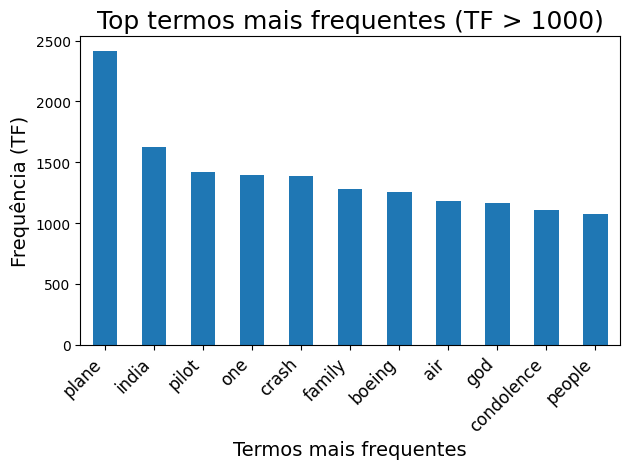

In [ ]:
tf_top = tf[tf["tf"] > 1000].sort_values(by="tf", ascending=False)

plt.figure(figsize=(50, 30))
ax = tf_top.plot.bar(x="words", y="tf", legend=False)

ax.set_xticklabels(
    tf_top["words"],
    rotation=45,
    ha="right",
    fontsize=12
)
plt.xlabel("Termos mais frequentes", fontsize=14)
plt.ylabel("Frequência (TF)", fontsize=14)
plt.title("Top termos mais frequentes (TF > 1000)", fontsize=18)
plt.tight_layout()
plt.show()

###2.3 Nuvem de palavras
Nesta seção, foi criada uma nuvem de palavras utilizando os termos mais frequentes dos comentários, apresentados no tf_top. O objetivo é exibir as palavras que aparecem com maior frequência no conjunto de dados em um formato visual, destacando claramente sua importância e prevalência nos comentários. Isso permite uma análise rápida das principais tendências e características mais relevantes nos dados textuais.



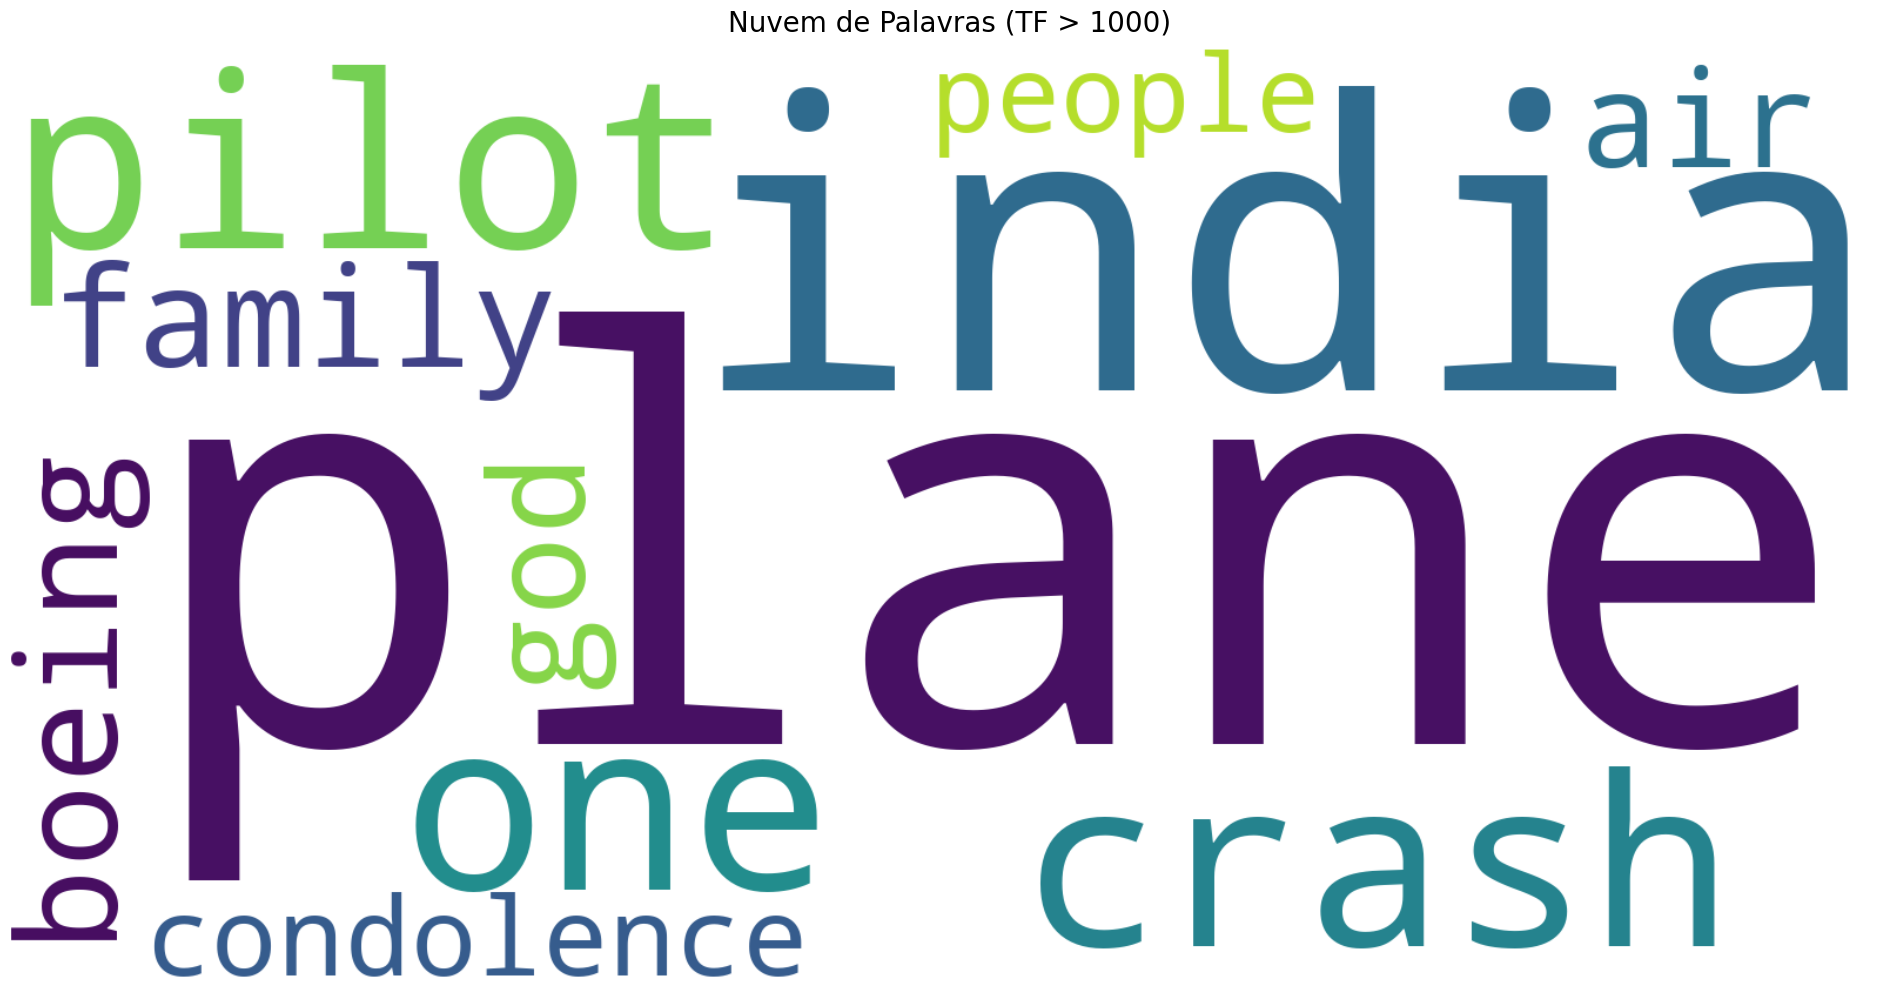

In [ ]:
tf_top["words"] = tf_top["words"].str.replace(r'[\"\'“”]', '', regex=True)

freq_dict = dict(zip(tf_top["words"], tf_top["tf"]))


wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    colormap="viridis",
    max_words=100,
).generate_from_frequencies(freq_dict)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras (TF > 1000)", fontsize=20)
plt.tight_layout()
plt.show()

## 3. Análise de Sentimento
Nesta seção, foi realizada uma análise de sentimentos dos comentários.Foi avaliado as expressões emocionais presentes nos comentários utilizando métodos matemáticos para determinar se esses comentários possuem, em geral, um sentimento positivo, negativo ou neutro. Isso permitirá representar o sentimento dos comentários em valores numéricos, possibilitando uma análise mais objetiva e mensurável.

In [ ]:
data['content']

,content
0,india
1,captain sumit sabharwal sir respect button om ...
2,india
3,condolence nigeria may allah forgive short com...
4,happened due boeing poor manufacturing
...,...
14368,ia officer faiz ahmed kidwai 1996batch officer...
14369,turkish technics look air india maintenance ce...
14370,tell poor guy wont suffering survivor guilt pr...
14371,india time


In [ ]:
data.head(30)

,content,likeCountLiked,likeCountDisliked,idioma
0,india,1,NaN,en
1,captain sumit sabharwal sir respect button om ...,1,NaN,en
2,india,1,NaN,en
3,condolence nigeria may allah forgive short com...,1,NaN,en
4,happened due boeing poor manufacturing,1,NaN,en
5,wifi high resolution camera cheap day also 5g ...,1,NaN,en
6,whistleblower saidnow boeing finished,2,NaN,en
7,may thier soul rest peace,1,NaN,en
8,may soul faithfully departed mercy god rest peace,1,NaN,en
9,condolence south sudan,1,NaN,en


Agora,será realizada uma análise de sentimentos para determinar o tom emocional dos textos, classificando cada comentário como 'positivo' (*pos*) ou 'negativo' (*neg*) com base no  ***compound sentiment score*** (pontuação composta de sentimento). Em seguida, foi analisada a distribuição desses rótulos de sentimento no conjunto de dados e sua relação com as pontuações gerais de avaliação (*rating scores*). Por fim, foi converetido esses rótulos de sentimento em valores numéricos para uso em modelos de machine learning. Essas etapas nos ajudam a extrair recursos significativos dos nossos dados textuais, preparando-os para as fases subsequentes de análise e modelagem.



In [ ]:
sia = SentimentIntensityAnalyzer()

data["polarity_score"] = data["content"].apply(lambda x: sia.polarity_scores(x)["compound"])

data["Sentiment_Label"] = data["polarity_score"].apply(
    lambda x: "pos" if x > 0.1 else ("neg" if x < -0.1 else "neu")
)

data.head(20)

,content,likeCountLiked,likeCountDisliked,idioma,polarity_score,Sentiment_Label
0,india,1,NaN,en,0.0000,neu
1,captain sumit sabharwal sir respect button om ...,1,NaN,en,0.4767,pos
2,india,1,NaN,en,0.0000,neu
3,condolence nigeria may allah forgive short com...,1,NaN,en,-0.2023,neg
4,happened due boeing poor manufacturing,1,NaN,en,-0.4767,neg
5,wifi high resolution camera cheap day also 5g ...,1,NaN,en,0.4588,pos
6,whistleblower saidnow boeing finished,2,NaN,en,0.0000,neu
7,may thier soul rest peace,1,NaN,en,0.5423,pos
8,may soul faithfully departed mercy god rest peace,1,NaN,en,0.8720,pos
9,condolence south sudan,1,NaN,en,0.0000,neu


##4. Modelamento

Nesta etapa, aplicamos a técnica TF-IDF (Term Frequency-Inverse Document Frequency) para transformar os textos em representações numéricas, permitindo que algoritmos de aprendizado de máquina processem os dados textuais.

Para o TF-IDF Word level, cada texto é representado por suas palavras individuais (unigramas). O TF-IDF calcula a importância de cada palavra considerando sua frequência no texto e em toda a base. O modelo é treinado com train_x e depois usado para transformar tanto os dados de treino quanto de teste.

Já para o TF-IDF udando bigramas (pares de palavras consecutivas) como unidade de análise. Isso ajuda a capturar melhor o contexto e a relação entre palavras, o que pode melhorar o desempenho em tarefas de classificação de texto.

In [ ]:
# Test-Train
train_x, test_x, train_y, test_y = train_test_split(data["content"],
                                                    data["Sentiment_Label"],
                                                    random_state=42)

In [ ]:
# TF-IDF Word Level
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [ ]:
# TF-IDF N-Gram Level (2,2)
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 2)).fit(train_x)
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(train_x)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(test_x)

###4.1 Regressão Logística

In [ ]:
# Modelling(Logistic Regression - Word level) - Avaliação do modelo
log_model_word = LogisticRegression().fit(x_train_tf_idf_word, train_y)
y_pred_word = log_model_word.predict(x_test_tf_idf_word)

print(classification_report(y_pred_word, test_y))

              precision    recall  f1-score   support

         neg       0.86      0.80      0.83      1596
         neu       0.77      0.74      0.76       990
         pos       0.75      0.86      0.80      1008

    accuracy                           0.80      3594
   macro avg       0.79      0.80      0.79      3594
weighted avg       0.80      0.80      0.80      3594



Interpretação dos resultados do treinamento:

O modelo consegue ter uma precisão de 86% para sentimentos negativos, 77% para sentimentos neutros e 75 % para sentimentos positivos, de modo geral o modelo tem uma acurácia de 80%.

Esses resultados indicam que o modelo tem uma boa previsão para sentimetnos negativos, porém, para sentimentos neutros e positivos há dificuldades em se avaliar.

Mas de modo geral, apresenta uma acurácia de 80% dos casos analisados.

In [ ]:
# Validação Cruzada

cv_score = cross_val_score(log_model_word, x_test_tf_idf_word, test_y, cv=5).mean()
print(f'\nScore médio cross-validation: {cv_score:.4f}')


Score médio cross-validation: 0.7251


O texte de validação cruzada permite avaliar a performance de um modelo de aprendizado de máquina de forma mais robusta e confiável. Ela ajuda a garantir que o modelo não está superajustado aos dados de treino e que pode generalizar bem para novos dados.

Resultados acima de 70% para modelos de analise de sentimentos é um bom resultado principalmente devido a dificuldade de interpretar comentários.

No caso do nosso modelo, a validação cruzada apresentou um resultado de 72,51% o que é um bom resultado.

In [ ]:
random_review = pd.Series(data["content"].sample(1).values)
new_comment_vector = tf_idf_word_vectorizer.transform(random_review)
pred = log_model_word.predict(new_comment_vector)

label_map = {'neg': 'Negativo', 'neu': 'Neutro', 'pos': 'Positivo'}
print(f"\nComentário aleatório:\n{random_review.iloc[0]}")
print(f"Sentimento previsto: {label_map.get(pred[0], pred[0])}")


Comentário aleatório:
one soul survived miracle see unscathed unbroken wonder call luck chance rare believe destiny gentle care wasnt time whisper say life spared reason beyond way death come suddenly without clue youth age health illhealth travel daily routine fine take u swiftly without goodbye sign leaving loved one grief pain memory could never gained yet survivor story find hope testament life mysterious scope destiny path journey cant define twist fate life divine survivor tale story share reminder life fragility care
Sentimento previsto: Positivo


A modelagem n-gram quebra o texto em grupo de palavras consecutivas para tentar capturar relações de contexto e ordem, ou seja, o algoritmo verifica um conjunto n de palavras em busca de um contexto ou sentido.

In [ ]:
# Modelamento com ngram level
tfidf_ngram = TfidfVectorizer(ngram_range=(1, 3))  # unigrama + bigrama + trigrama
x_train_tf_idf_ngram = tfidf_ngram.fit_transform(train_x)
x_test_tf_idf_ngram = tfidf_ngram.transform(test_x)
log_model_ngram = LogisticRegression().fit(x_train_tf_idf_ngram, train_y)
y_pred_ngram = log_model_ngram.predict(x_test_tf_idf_ngram)

print(classification_report(y_pred_ngram, test_y))

              precision    recall  f1-score   support

         neg       0.90      0.70      0.79      1889
         neu       0.58      0.79      0.67       699
         pos       0.72      0.83      0.77      1006

    accuracy                           0.75      3594
   macro avg       0.73      0.77      0.74      3594
weighted avg       0.78      0.75      0.76      3594



Após a aplicação da classificação n-gram, a acuracia do modelo caiu de 80% para 75% indicando que ao analisarmos os resultados, vemos que a precisão em classificar sentimetnos negativos aumentou em relação o modelo básico, porém, a precisão para classificar comentários neutros reduziu significativamente de 77% para 58% indicando a dificuldade que o modelo tem em reconhecer comentários neutros.
A classificação de comentários positivos houve uma pequena queda na precisão de 75% no modelo básico para 72% no modelo com n-gram.

In [ ]:
# Cross Validation
cross_val_score(log_model_ngram, x_test_tf_idf_ngram, test_y, cv=5).mean()

np.float64(0.7047919386644248)

O modelo com n-gram apresentou um resultado do teste de validação cruzada de 70,47%, indicando que o modelo está no limiar de aceitabilidade para o problema envolvido. Esse resultado foi menor do que o apresentado no modelo básico.

###4.2 Random Forest

O Random Forest é um algoritmo de aprendizado de máquina baseado em múltiplas árvores de decisão. Ele fornece a resposta de acordo com o resultado de cada árvore contida em seu modelo, o resultado que for mais provável(aparecer mais vezes como resultado nas arvores de decisão) é apresentado.

In [ ]:
# Modelling (Random Forest)
rf_model_word = RandomForestClassifier(random_state=42)
rf_model_word.fit(x_train_tf_idf_word, train_y)

# Fazer previsão no conjunto de teste
y_pred_rf = rf_model_word.predict(x_test_tf_idf_word)

# Avaliar o modelo com relatório de classificação
print(classification_report(test_y, y_pred_rf))

              precision    recall  f1-score   support

         neg       0.80      0.82      0.81      1476
         neu       0.73      0.83      0.77       962
         pos       0.86      0.73      0.79      1156

    accuracy                           0.79      3594
   macro avg       0.79      0.79      0.79      3594
weighted avg       0.80      0.79      0.79      3594



O resultado do modelo baseado no random forest, foi uma acurácia de 79% menor do que o modelo básico(80%) porém maior que o modelo básico + n-gram (75%), indicando um bom resultado.

In [ ]:
# Validação cruzada para o modelo com random forest
cross_val_score(rf_model_word, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

np.float64(0.7259335737890369)

O resultado apresentado foi de 72,59%, um resultado aceitável.

Iremos adicionar o método n-gram ao modelo random forest para ver se conseguimos aumentar sua acuracia e precisão.

In [ ]:
#Adicionando o modelo n-gram ao random forest
rf_model_ngram = RandomForestClassifier().fit(x_train_tf_idf_ngram, train_y)
y_pred_ngram = rf_model_ngram.predict(x_test_tf_idf_ngram)
print(classification_report(test_y, y_pred_ngram))

              precision    recall  f1-score   support

         neg       0.80      0.77      0.79      1476
         neu       0.64      0.85      0.73       962
         pos       0.86      0.65      0.74      1156

    accuracy                           0.75      3594
   macro avg       0.76      0.76      0.75      3594
weighted avg       0.77      0.75      0.76      3594



Ao adicionarmos ao modelo a método n-gram, houve uma redução na sua acurácia e uma redução significativa na precisão de classificação de comentários neutros, ou seja, ao adicionar o n-gram o modelo ficou pior.

In [ ]:
# Validação cruzada do modelo random forest + n-gram.
cross_val_score(rf_model_ngram, x_test_tf_idf_ngram, test_y, cv=5, n_jobs=-1).mean()

np.float64(0.7081260339143269)

O resultado da validação cruzada para o modelo random forest + n-gram foi de 70%, no limiar de aceitabilidade.

CONCLUSÃO:

O modelo de regressão linear logistica apresentou resultados satisfatório para a classificação de sentimentos apresentando os maiores indices de precisão e acurácia, porém, todos os modelos apresentado apresentaram um resultado pior ao classificar comentários neutros, principalemnte após a implentação do n-gram na tentativa de buscar um contexto.